In [1]:
import pandas as pd
import numpy as np
import os

import plotly.offline as pyo

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

from scag_colors import gen_color, scenario_colors, veh_fuel_colors

pyo.init_notebook_mode(connected=True)

from IPython.display import Image
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

### webpage outline
- Project description
- User guide
- SCAG region & CA climate policy
- Infrastructure transition frame
- Large-scale transition
- Consumer transition
- Local results dashboard
- Gaps that local policy could target

### Project description
California has adopted binding greenhouse gas emissions reductions of 40% below 1990 by 2030 and 80% below 1990 by 2050.

In [3]:
### add a graph with California emissions targets. could be cool to add a click handler to point to the targets for each year
ca_emissions = pd.read_csv(r'\\STORAGE\E3Data\E3 Projects\SCAG Pathways\PlotlyDev\PATHWAYS_csvs\ca_emissions.csv', index_col = 0)

ca_2020 = ca_emissions.loc[1990, 'MMTCO2']
ca_2030 = ca_emissions.loc[1990, 'MMTCO2'] * .6
ca_2050 = ca_emissions.loc[1990, 'MMTCO2'] * .2

In [4]:
ca_hist = {'type' : 'scatter',
           'x' : ca_emissions.index.values,
           'y' : ca_emissions['MMTCO2'],
           'showlegend' : False,
           'text' : 'Past emissions',
           'mode' : 'lines',
           'line' : {'color' : 'darkgrey',
                     'width' : 3},
           'name' : 'CA emissions',
           'hoverinfo' : 'text+x'}

goal2020 = {'type' : 'scatter',
           'x' : [2015, 2020, 2030, 2050],
           'y' : [ca_emissions.loc[2015, 'MMTCO2'], ca_2020, ca_2030, ca_2050],
           'showlegend' : False,
           'mode' : 'lines',
           'line' : {'color' : 'black',
                     'dash' : 'dash',
                     'width' : 3},
           'hoverinfo' : 'text+x'}


near = {'type' : 'scatter',
           'x' : [2020],
           'y' : [ca_2020],
           'text' : '2020 goal<br>reduce below 1990 emissions',
           'mode' : 'markers',
           'marker' : {'size' : '14',
                       'color' : 'black',
                       'symbol' : 'diamond-open',
                       'line' : {'width' : '3'}},
           'name' : '2020 goal',
           'hoverinfo' : 'text+x'}

forty = {'type' : 'scatter',
           'x' : [2030],
           'y' : [ca_2030],
           'text' : '2030 goal<br>40% below 1990 emissions',
           'mode' : 'markers',
           'marker' : {'size' : '14',
                       'color' : 'black',
                       'symbol' : 'circle-open',
                       'line' : {'width' : '3'}},
           'name' : '2030 goal',
           'hoverinfo' : 'text+x'}

eighty = {'type' : 'scatter',
           'x' : [2050],
           'y' : [ca_2050],
           'text' : '2050 goal<br>80% below 1990 emissions',
           'mode' : 'markers',
           'marker' : {'size' : '14',
                       'color' : 'black',
                       'symbol' : 'square-open',
                       'line' : {'width' : '3'}},
           'name' : '2050 goal',
           'hoverinfo' : 'text+x'}

layout = {'title' : 'California Emissions Targets',
          'xaxis' : {'title' : ''},
          'yaxis' : {'title' : 'MMtCO2',
                     'range' : [0, 500]},}

data = Data([ca_hist, goal2020, near, forty, eighty])
fig = Figure(data = data, layout = layout)

pyo.iplot(fig)

The SCAG region is nearly half of California in terms of both population and emissions, so deep decarbonization must occur in Southern California if the state's ambitions are to be achieved. 

In [5]:
#pd.read_csv(r'\\STORAGE\E3Data\E3 Projects\SCAG Pathways\Model\11-27-outputs\Total_Emissions_by_1.csv')

In [5]:
### add a graph showing breakdown of SCAG emissions (double donut), and compare those emissions to california (bar)

os.chdir(r'C:\Users\dan\OneDrive - E3\SCAG\outputs\Feb_Revisions6')

emissions = pd.read_csv('Total_Emissions_by_1.csv')
scag_pop = pd.read_csv('scag_population.csv', index_col=0, header = None, squeeze = True)
scag_pop_share = pd.read_csv('scag_population_share.csv', index_col=0, header = None, squeeze = True)

scag_p = scag_pop.loc[2015]
ca_p = scag_pop.loc[2015] / scag_pop_share.loc[2015] - scag_pop.loc[2015]

epiv_scag = pd.pivot_table(emissions.query('Geography_SCAG in "SCAG"'), index = 'Output_Year', 
                                      columns = ['Active_Cases', 'ARB_Sectors1'],
                                      values = 'Value', aggfunc = np.sum)

epiv = pd.pivot_table(emissions, index = 'Output_Year', 
                                      columns = ['Active_Cases', 'Geography_SCAG', 'ARB_Sectors1'],
                                      values = 'Value', aggfunc = np.sum)

scag2015 =  epiv['Building Electrification'].loc[2015, 'SCAG']
ros2015 = epiv['Building Electrification'].loc[2015, 'Rest of State']

scag_prop = scag2015 / scag2015.sum()
ros_prop = ros2015 / ros2015.sum()

scag_co2 = tuple(scag2015.values)
ros_co2 = tuple(ros2015.values)

scag_co2_prop = tuple(scag_prop.values)
ros_co2_prop = tuple(ros_prop.values)

labels = list(ros2015.index)

scag_per = (scag_co2 / scag_p) * 10**6
ros_per = (ros_co2/ ca_p) * 10**6

scag = Bar({'x' : labels,
            'y' : [round(x,1) for x in scag_per],
            'name' :  'SCAG'})

ros = Bar({'x' : labels,
           'y' : [round(x,1) for x in ros_per],
           'name' : 'Rest of State'})

data = Data([scag, ros])

layout = Layout({'barmode' : 'group',
                 'title' : 'Comparision of per-capita emissions:<br>SCAG and Rest of State',
                 'yaxis' : {'title' : 'MMTCO2'}})

fig = Figure(data = data, layout = layout)

pyo.iplot(fig)


In [6]:
trace = {
      "values": scag_co2,
      "labels": [str(round(x, 1)) + ' <br>MMTCO2' for x in scag_co2],
      #"domain": {"x": [0, .48]},
      "name": "",
      "hoverinfo":"label+values+name",
      "hole": .4,
      "type": "pie",
      'text' : labels,
      'textposition' : 'outside'
    }

data = Data([trace])

layout = Layout({'title' : 'SCAG 2015 emissions',
                 'showlegend' : False,
                 'annotations' : [
                     {'font' : {'size' : 16},
                      'text' : str(round(pd.Series(scag_co2).sum(), 0))[:3] + " <br>MMTCO2",
                      'x' : 0.5,
                      'y' : 0.5,
                      'showarrow' : False}
                 ]
                 })

fig = Figure(data = data, layout = layout)

pyo.iplot(fig)

### PATHWAYS basics

SCAG hired E3 to conduct a study to develop region-specific emissions reduction scenarios. In order to complete this study, E3 implemented a downscaled version of the California PATHWAYS model. California PATHWAYS has been used in a number of state climate policy planning contexts, including to inform the California Air Resources Board's 2017 Scoping Plan Update. 

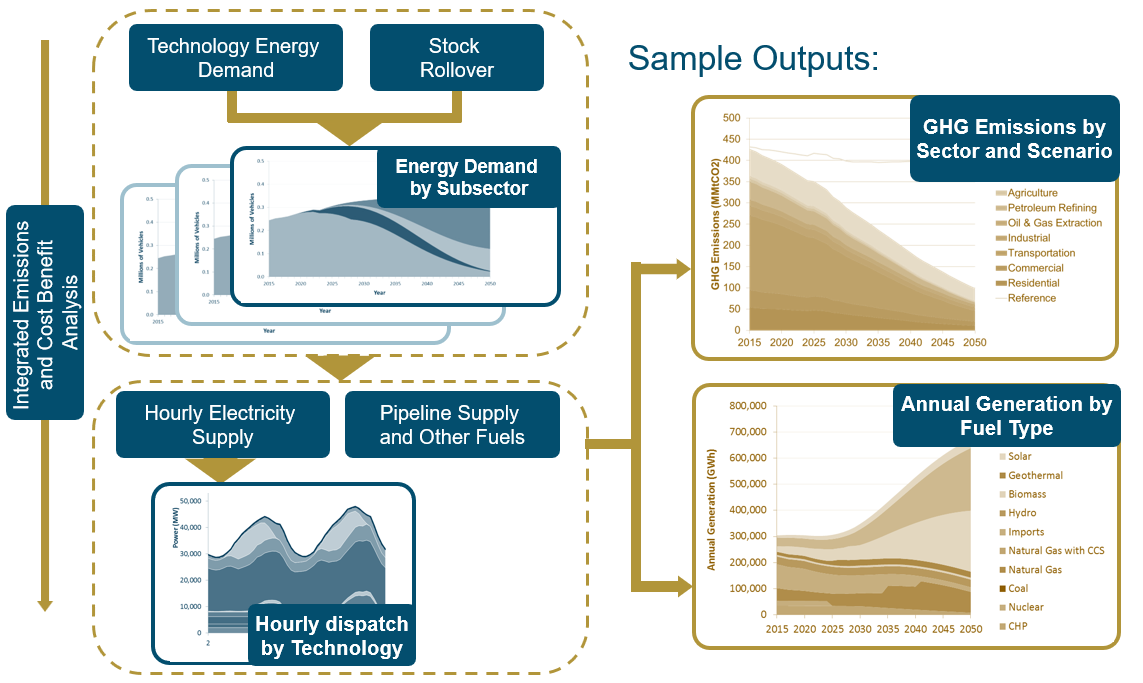

In [7]:
Image(filename = r'C:\Users\dan\OneDrive - E3\SCAG\Plotly\csvs\PATHWAYS.png')

### User guide
The PATHWAYS model is an economy-wide view of the SCAG region's energy infrastructure, energy usage and emissions. The goal of this web report is to distill PATHWAYS results in an interactive summary. Readers interested in a more detailed discussion of the modeling assumptions for, and results of, this analysis can find the full report <b>here</b>. 

PATHWAYS is a scenario-driven, user-specified model that is designed to test "what if?" questions. Though less certain than a prediction, a scenario is more grounded in fact than mere speculation. After consultation with a board of advisors, E3 analyzed three distinct mitigations scenarios in this analysis including:
- <u>A high building electrification scenario</u>: where building emissions are reduced by switching space-heating, water-heating and cooking from natural gas fuels to low-carbon electricity
- <u>A high electrification scenario</u>: where transportation electrification goes beyond already high levels in the building electrification scenario
- <u>A high biofuels scenario</u>: where biofuels are used to reduce the carbon intensity of gasoline, diesel and natural gas

In [8]:
metric_names = ['<Passenger ZEV sales', 'Passenger ZEV<br>stock share', 'Passenger vehicle<br>VMT reduction', 
                'Heat pump sales', 'Heat pump<br>stock share', 'Biofuel share<br>of fossil fuels'][::-1]

metric_names = ['<b>' + x for x in metric_names]

metric_names = [x + '</b>' for x in metric_names]


be_metrics = [.5, .2, .11, .5, .2 , .05][::-1]
hb_metrics = [.25, .15, .09, .2, .05, .1][::-1]
he_metrics = [.55, .25, .05, .5, .2, .05][::-1]

trace0 = go.Scatter(
    x=be_metrics,
    y=metric_names,
    mode='markers',
    hoverinfo = 'text',
    text = ['50% of sales<br>X million annually', '20% of on-road LDVs<br>2.8 million total', 
            '11% reduction from 2018', 
            '50% of sales<br>X million annually', '20% of space and water heaters<br>X million total',
            '5% blend with fossil fuels'][::-1],
    name='Building Electrification',
    marker=dict(
        color='#e6ab02',
        opacity = 0.9,
        line=dict(
            color='rgba(156, 165, 196, 1.0)',
            width=1,
        ),
        symbol='square',
        size=21,
    )
)

trace1 = go.Scatter(
    x=hb_metrics,
    y=metric_names,
    mode='markers',
    hoverinfo = 'text',
    text = ['25% of sales<br>X million annually', '10% of on-road LDVs<br>2.2 million total', 
        '8% reduction from 2018', 
        '10% of sales<br>X million annually', '5% of space and water heaters<br>X million total',
        '10% blend with fossil fuels'][::-1],
    name='High Biofuels',
    marker=dict(
        color='#b3de69',
        opacity = 0.9,
        line=dict(
            color='rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='diamond',
        size=20,
    )
)

trace2 = go.Scatter(
    x=he_metrics,
    y=metric_names,
    mode='markers',
    hoverinfo = 'text',
    text = ['55% of sales<br>X million annually', '20% of on-road LDVs<br>3.2 million total', 
        '5% reduction from 2018', 
        '50% of sales<br>X million annually', '20% of space and water heaters<br>X million total',
        '5% blend with fossil fuels'][::-1],
    name='High Electrification',
    marker=dict(
        color='#8da0cb',
        opacity = 0.9,
        line=dict(
            color='rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=20,
    )
)

data = [trace0, trace1, trace2]
layout = go.Layout(
    title="Key Variations in PATHWAYS Scenarios: 2030",
    titlefont=dict(
        size = 18),
    xaxis=dict(
        range = [0,1],
        showgrid=False,
        showline=False,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)',
            size = 16
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
            size = 14,
        ),
        autotick=False,
        dtick=1,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
        tickformat = '.0%',
        hoverformat = ''
        
    ),
    
    yaxis = dict(
        titlefont = dict(size = 20)),

    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        x = .65,
        y = 1.05,
        #yanchor='top',
        #xanchor='left',
        orientation = 'h',
    ),
    width=800,
    height=600,
    paper_bgcolor='rgb(254, 247, 234)',
    plot_bgcolor='rgb(254, 247, 234)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

## add a dropdown to toggle 2030 and 2050
## add trucks
## add actual quantities

### SCAG region & CA climate policy

In [9]:
### VMT by scenario

### Deep decarbonization: infrastructure transitions

In [10]:
### stock rollover graph

#### Large infrastructure transition

In [11]:
generation = pd.read_csv(r'C:\Users\dan\OneDrive - E3\SCAG\Plotly\csvs\generation.csv', header=[0,1], index_col=0)

In [12]:
generation.columns.get_level_values(0).unique()

Index(['Building Electrification', 'High Biofuels', 'Moderate VMT',
       'Reference', 'SB 350 Plus'],
      dtype='object', name='Active_Cases')

In [13]:
stacked_order = ['Imports',
                'Natural Gas',
                'CHP',
                'Hydro',
                'Wind',
                'Geothermal',
                'Solar',
                'Rooftop PV',
                'Biomass',
                'Coal',
                'Nuclear']

scenario = 'Building Electrification'

gen_df = generation.loc[:, scenario][stacked_order].fillna(0)

gen_c = gen_df.cumsum(1)

for label in stacked_order:
    gen_c[label + '_text'] = label + '<br>' + gen_df[label].apply(lambda x: str(round(x, 1))) + ' TWh'

traces = []
for g in gen_df.columns.values:
    traces.append({'type' : 'scatter',
                       'x' : gen_c.index.values,
                       'y' : gen_c[g],
                       'text' :  gen_c[g + '_text'],
                       'mode' : 'lines',
                       'opacity' : .99,
                       'line' : {'color' : gen_color(g),
                                 'width' : 0},
                       'name' : g,
                       'hoverinfo' : 'text+x',
                       'hoveron' : 'points + fills',
                       'fill' : 'tonexty',
                       'fillcolor' : {'color' : gen_color(g)}})

layout = {'title' : scenario + ' Electricity Generation',
          'hovermode' : 'closest',
          'width' : 800,
          'height' : 600,
          'xaxis' : {'title' : ''},
          'yaxis' : {'title' : 'TWh'},}

data = Data(traces)
fig = Figure(data = data, layout = layout)

pyo.iplot(fig)



In [14]:
hdv = pd.read_csv(r'C:\Users\dan\OneDrive - E3\SCAG\Plotly\csvs\HDVstocks.csv', header = [0,1], index_col=0).fillna(0)

scenario = 'High Electrification'
hdv = hdv[scenario]
ordered_hd = list(hdv.loc[2015].sort_values(ascending = False).index)
hdv = hdv[ordered_hd]
hdv_c = hdv.cumsum(1)

for label in ordered_hd:
    hdv_c[label + '_text'] = label + '<br>' + hdv[label].apply(lambda x: str(round(x / 10**3, 0))[:-2]) + 'k Vehicles'

traces = []
for g in hdv.columns.values:
    traces.append({'type' : 'scatter',
                       'x' : hdv.index.values,
                       'y' : hdv_c[g],
                       'text' :  hdv_c[g + '_text'],
                       'mode' : 'lines',
                       'opacity' : .7,
                       'line' : {'color' : veh_fuel_colors(g),
                                 'width' : 0},
                       'name' : g,
                       'hoverinfo' : 'text+x',
                       'fillcolor' : 'veh_fuel_colors(g)',
                       'fill' : 'tonexty'})

layout = {'title' : scenario + ': HDV fleet',
          'hovermode' : 'closest',
          'width' : 800,
          'height' : 600,
          'xaxis' : {'title' : ''},
          'yaxis' : {'title' : 'Vehicles'},}

data = Data(traces)
fig = Figure(data = data, layout = layout)

pyo.iplot(fig)


## toggle by scenario
## toggle by truck types

In [16]:
### electric power graphs

### trucks

### bubble graph of refineries 
#https://plot.ly/python/bubble-maps/

#### Consumer infrastructure transition

In [8]:
### space heating stock rollover

### LDV chloropeth by county
# https://plot.ly/python/county-choropleth/

In [9]:
### stock-rollover of consumer techs
### DGPV
### table with key statistics like:
#### 2015 and 2050 emissions, number of public EV chargers needed

### City downscale dashboard
- emissions downscaled by population, vehicles downscaled by population, appliances downscaled by households
- summary (total emissions bar chart, number of vehicles, number of homes retrofitted)

### Gaps for local policy

In [10]:
### graph of sectors